<a href="https://colab.research.google.com/github/thaithinhhl/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Bài 1 ##

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


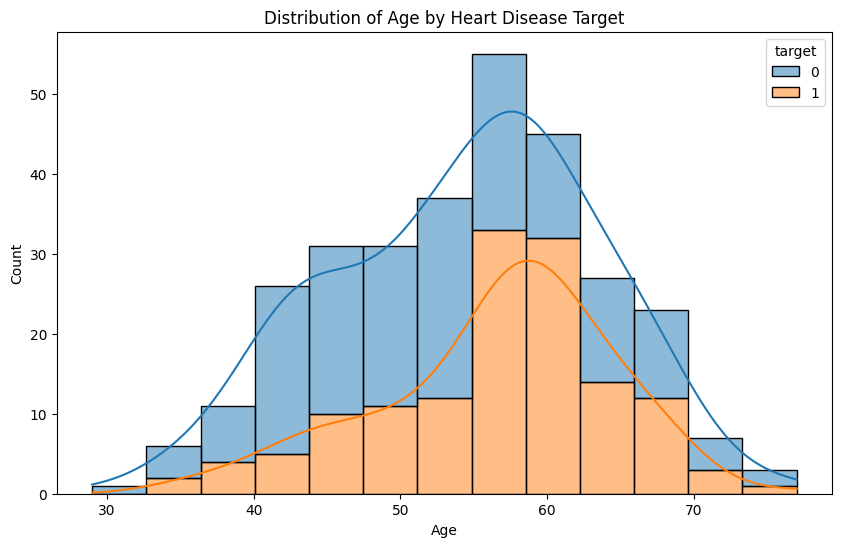

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/cleveland (1).csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Replace missing values
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Assign target labels
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Visualization of distribution of target by age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Distribution of Age by Heart Disease Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Câu 2 ##

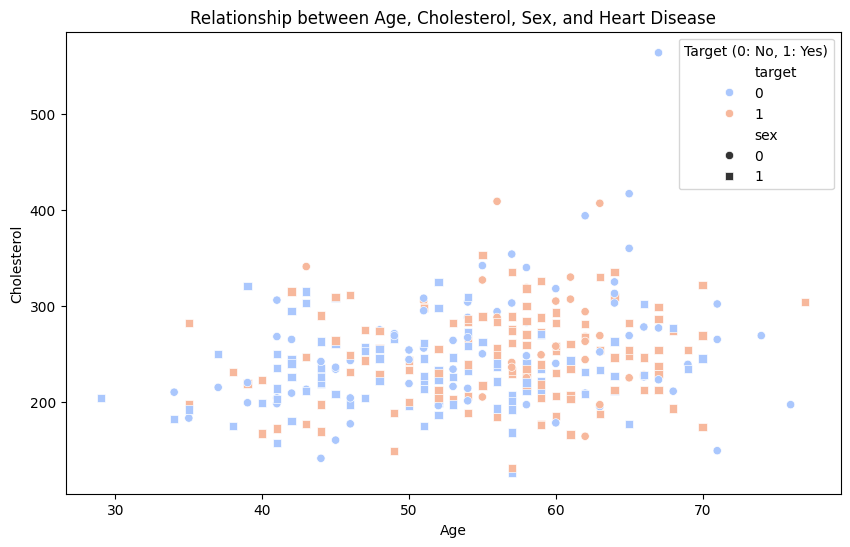

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


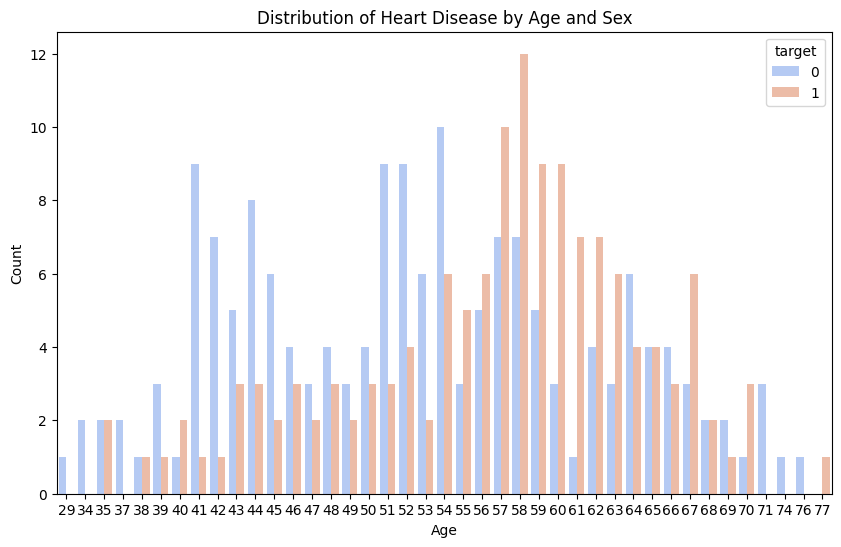

In [4]:

# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/cleveland (1).csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Replace missing values
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Assign target labels (0: No heart disease, 1: Heart disease)
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Visualization: Age, Sex, and Heart Disease
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='target', style='sex', markers=['o', 's'], palette='coolwarm')
plt.title('Relationship between Age, Cholesterol, Sex, and Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Target (0: No, 1: Yes)')
plt.show()

# Alternatively, use a countplot to show the distribution of heart disease by age and sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age', hue='target', palette='coolwarm', dodge=True)
plt.title('Distribution of Heart Disease by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Câu 3 ##

In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train))
print("Accuracy for test set for KNeighborsClassifier = {}".format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


## Câu 4 ##

In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình SVM với kernel 'rbf'
svm = SVC(kernel='rbf', random_state=42)

# Huấn luyện mô hình
svm.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for SVM = {}".format(accuracy_for_train))
print("Accuracy for test set for SVM = {}".format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


## Câu 5 ##

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Naive Bayes
nb = GaussianNB()

# Huấn luyện mô hình
nb.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for Naive Bayes = {}".format(accuracy_for_train))
print("Accuracy for test set for Naive Bayes = {}".format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


## Câu 6 ##


In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Decision Tree với các tham số
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

# Huấn luyện mô hình
tree.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for Decision Tree = {}".format(accuracy_for_train))
print("Accuracy for test set for Decision Tree = {}".format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


## Câu 7 ##

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest với các tham số
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)

# Huấn luyện mô hình
rf.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


## Câu 8 ##

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình AdaBoost với các tham số
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Huấn luyện mô hình
ada.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for AdaBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for AdaBoost = {}".format(accuracy_for_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


## Câu 9 ##

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình GradientBoost với các tham số
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)

# Huấn luyện mô hình
gb.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for GradientBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for GradientBoost = {}".format(accuracy_for_test))


Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


## Câu 10 ##

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình XGBoost với các tham số
xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)

# Huấn luyện mô hình
xgb.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for XGBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for XGBoost = {}".format(accuracy_for_test))


Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


## Câu 11 ##

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuẩn bị dữ liệu (giả sử bạn đã đọc df từ file trước đó)
X = df.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối cùng (cột target)
y = df.iloc[:, -1].values   # Cột cuối cùng là target

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng các mô hình base learners
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier())
]

# Xây dựng mô hình meta learner (model cuối cùng sử dụng stacking)
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(random_state=42),
    cv=5
)

# Huấn luyện mô hình stacking
stacking_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Tính toán confusion matrix cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính toán độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả độ chính xác
print("Accuracy for training set for Stacking = {}".format(accuracy_for_train))
print("Accuracy for test set for Stacking = {}".format(accuracy_for_test))


Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.84
